In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources (run this once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('Restaurant reviews.csv')

# Keep only the relevant columns
data = data[['Review', 'Rating']]

# Convert 'Rating' to numeric, forcing errors to NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Clean the dataset
def preprocess_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Apply preprocessing
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

# Define sentiment labels based on ratings
data['Sentiment'] = data['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative')



In [5]:
data

,Review,Rating,Cleaned_Review,Sentiment
0,"The ambience was good, food was quite good . h...",5.0,ambience good food quite good saturday lunch c...,Positive
1,Ambience is too good for a pleasant evening. S...,5.0,ambience good pleasant evening service prompt ...,Positive
2,A must try.. great food great ambience. Thnx f...,5.0,must try great food great ambience thnx servic...,Positive
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincerety go...,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodwe ordered kodi drumstick basket mutt...,Positive
...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well start nice courteous s...,Negative
9996,This place has never disappointed us.. The foo...,4.5,place never disappointed u food courteous staf...,Positive
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,bad rating mainly chicken bone found veg food ...,Negative
9998,I personally love and prefer Chinese Food. Had...,4.0,personally love prefer chinese food couple tim...,Positive


In [7]:
# Split the data
X = data['Cleaned_Review']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
from sklearn.model_selection import GridSearchCV

# Custom parameter grid to handle solver-penalty compatibility
param_grid = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']}, # Regularization strength,types, Solvers that support l1 and elasticnet penalties
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'saga']},
    {'C': [0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5]},
]
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Accuracy Score: 0.869125


In [29]:
# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Accuracy Score: 0.869125



Evaluation of all parameter combinations on test set:

Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.65      0.74       729
    Positive       0.82      0.93      0.88      1271

    accuracy                           0.83      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.83      0.83      0.83      2000



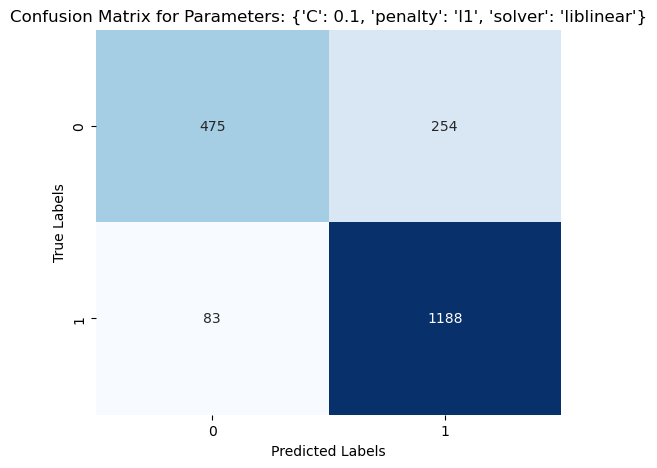


Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.80      0.83       729
    Positive       0.89      0.93      0.91      1271

    accuracy                           0.88      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.88      0.88      2000



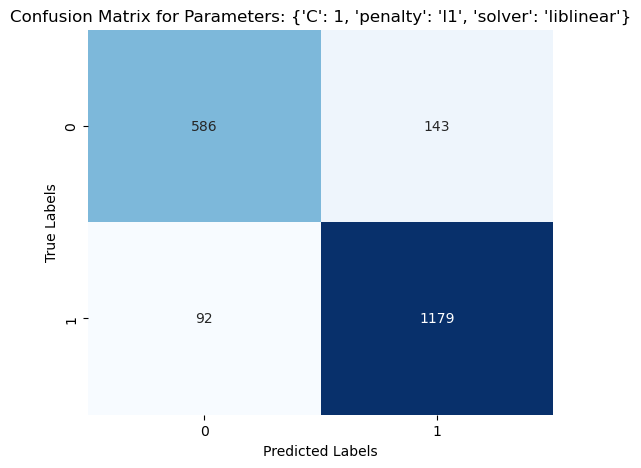


Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80       729
    Positive       0.88      0.90      0.89      1271

    accuracy                           0.86      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.86      0.86      0.86      2000



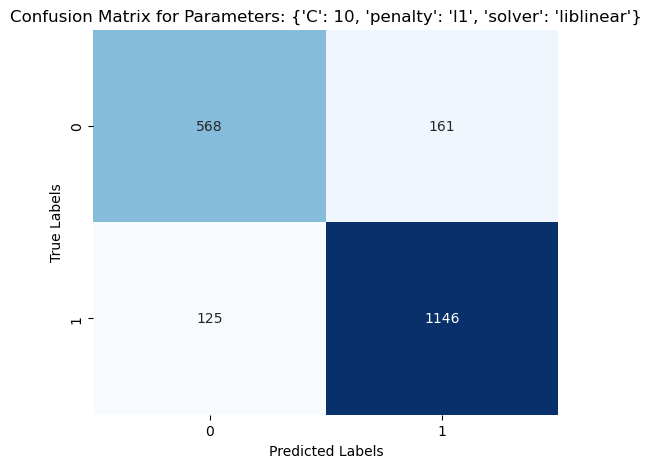


Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74       729
    Positive       0.85      0.86      0.86      1271

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



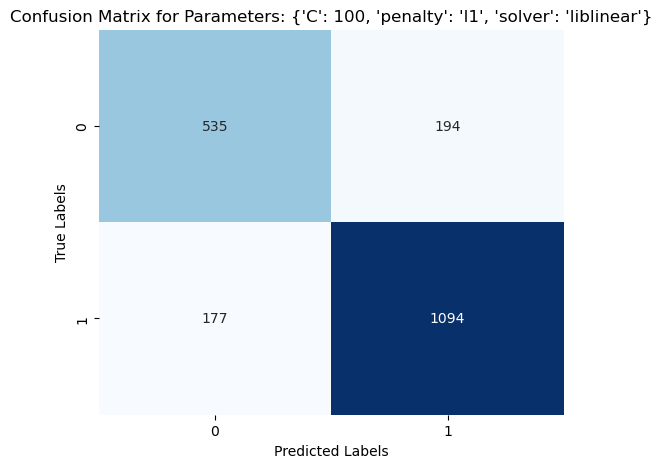


Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.63      0.75       729
    Positive       0.82      0.97      0.89      1271

    accuracy                           0.85      2000
   macro avg       0.88      0.80      0.82      2000
weighted avg       0.86      0.85      0.84      2000



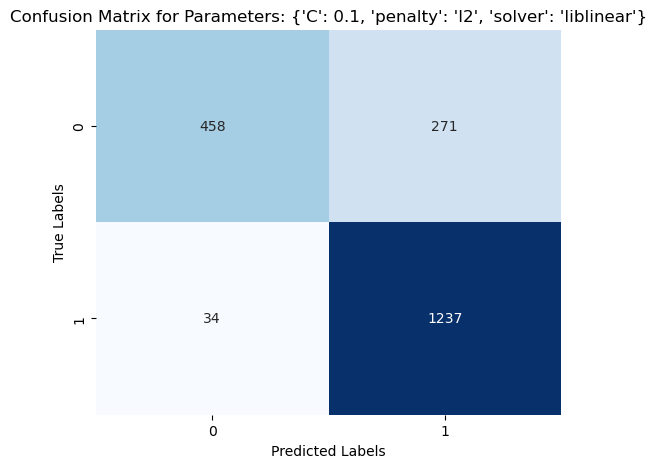


Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.63      0.75       729
    Positive       0.82      0.97      0.89      1271

    accuracy                           0.85      2000
   macro avg       0.87      0.80      0.82      2000
weighted avg       0.86      0.85      0.84      2000



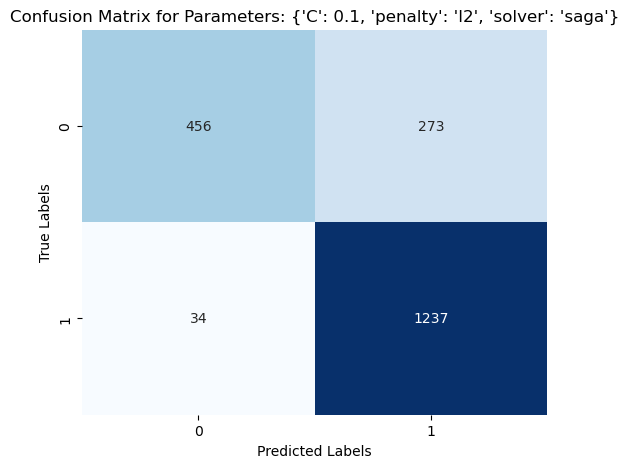


Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.79      0.83       729
    Positive       0.89      0.94      0.91      1271

    accuracy                           0.88      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.88      0.88      2000



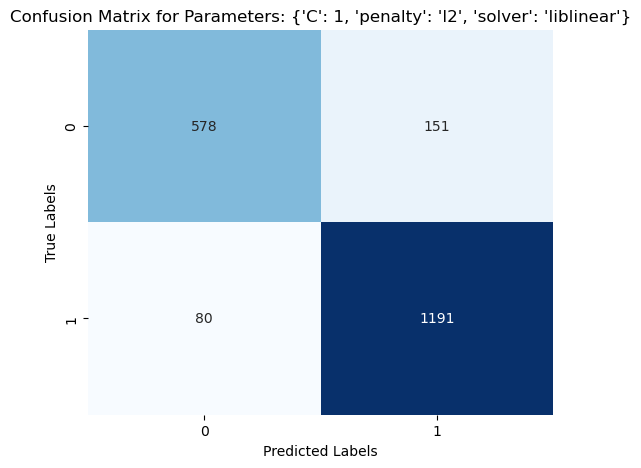


Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.79      0.83       729
    Positive       0.89      0.94      0.91      1271

    accuracy                           0.88      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.88      0.88      2000



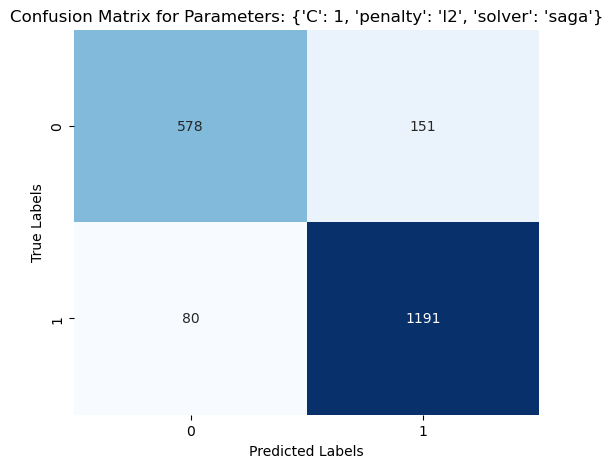


Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.82       729
    Positive       0.89      0.91      0.90      1271

    accuracy                           0.87      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.87      0.87      2000



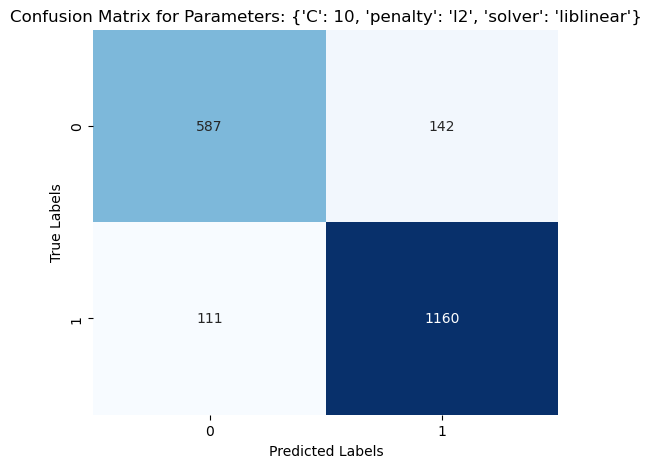


Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.82       729
    Positive       0.89      0.91      0.90      1271

    accuracy                           0.87      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.87      0.87      2000



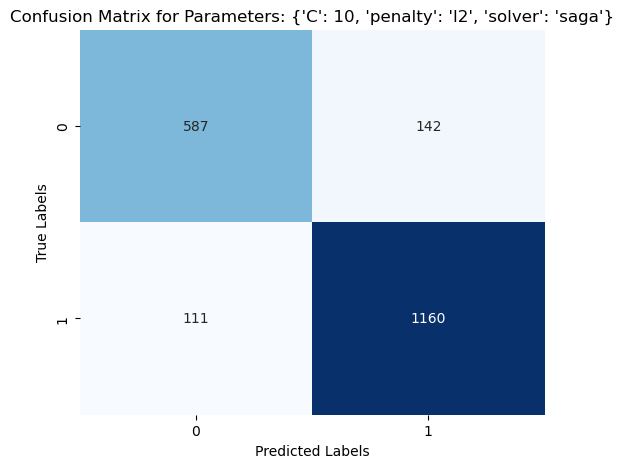


Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79       729
    Positive       0.87      0.89      0.88      1271

    accuracy                           0.85      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.85      0.85      0.85      2000



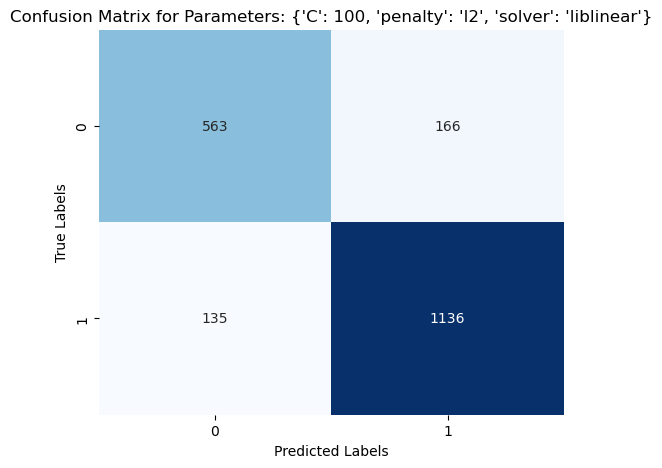


Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79       729
    Positive       0.87      0.90      0.88      1271

    accuracy                           0.85      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.85      0.85      0.85      2000



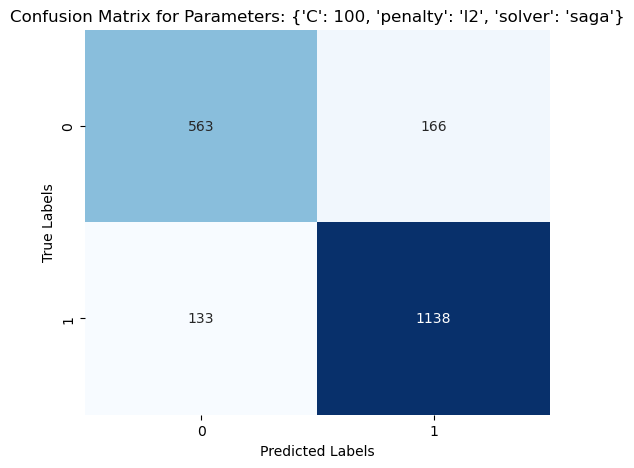


Parameters: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.53      0.68       729
    Positive       0.78      0.97      0.87      1271

    accuracy                           0.81      2000
   macro avg       0.85      0.75      0.77      2000
weighted avg       0.83      0.81      0.80      2000



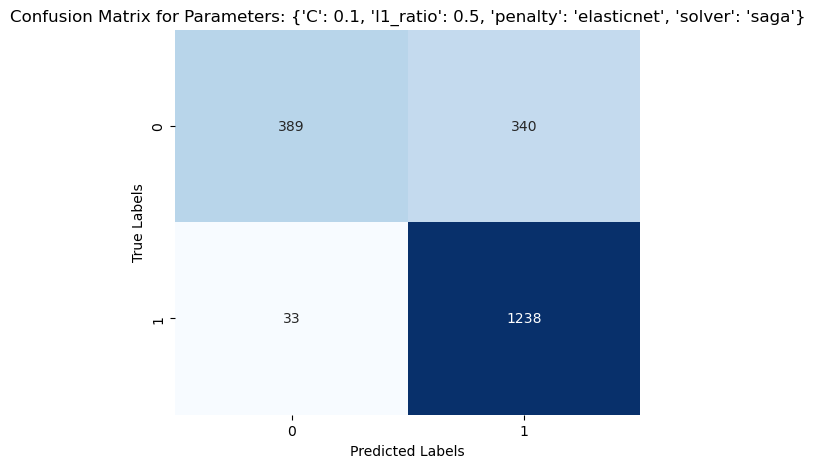


Parameters: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.79      0.83       729
    Positive       0.89      0.93      0.91      1271

    accuracy                           0.88      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.88      0.88      2000



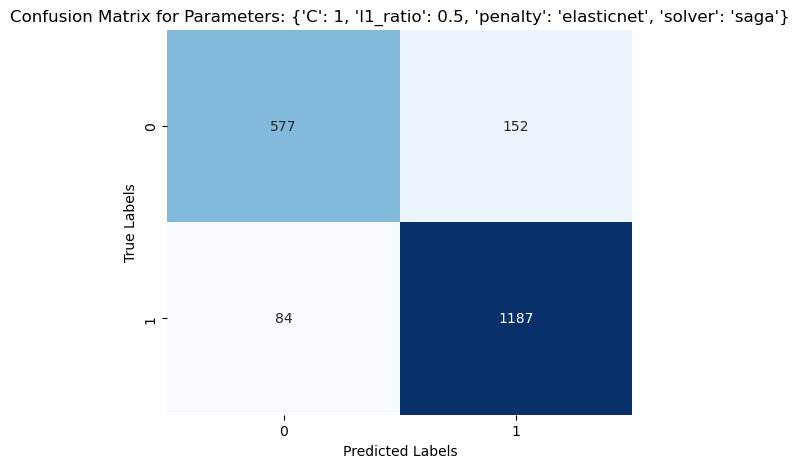


Parameters: {'C': 10, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.80      0.82       729
    Positive       0.89      0.91      0.90      1271

    accuracy                           0.87      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.87      0.87      0.87      2000



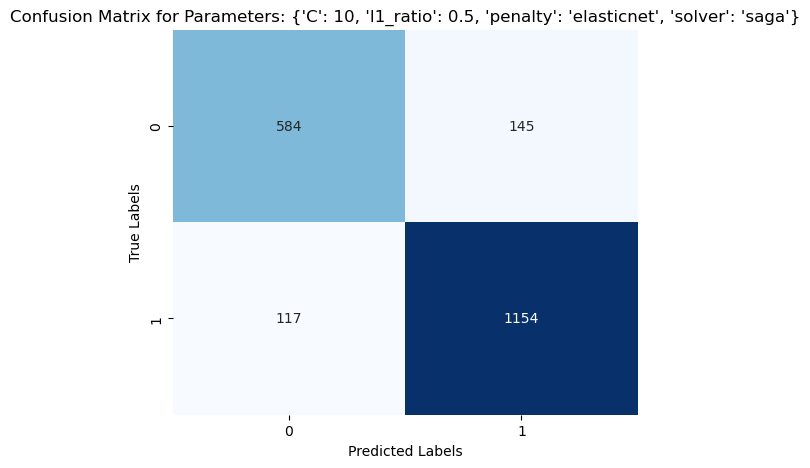


Parameters: {'C': 100, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78       729
    Positive       0.87      0.89      0.88      1271

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



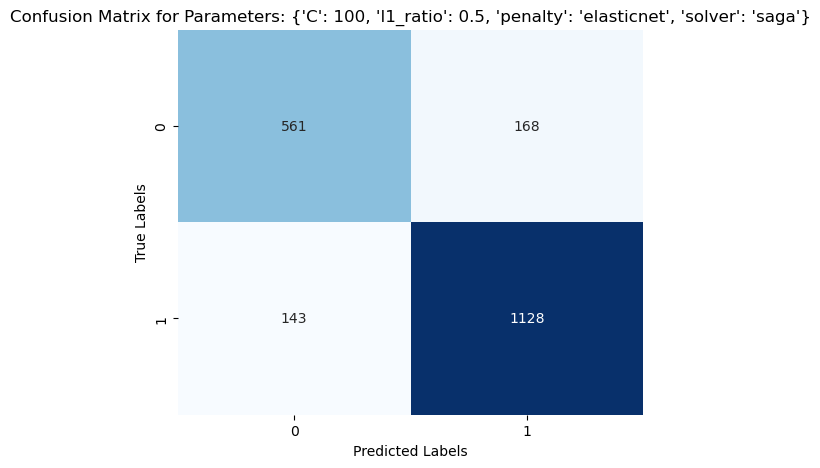

In [35]:
from sklearn.model_selection import ParameterGrid
import warnings
# Loop over each parameter combination for evaluation on the test set
print("\nEvaluation of all parameter combinations on test set:")

for params in ParameterGrid(param_grid):
    # Suppress warnings for incompatible configurations
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        try:
            # Initialize and train the Logistic Regression model with current parameters
            model = LogisticRegression(max_iter=1000, **params)
            model.fit(X_train_tfidf, y_train)

            # Predict on the test set
            y_pred = model.predict(X_test_tfidf)

            # Display the current parameters
            print(f"\nParameters: {params}")

            # Classification report
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            # Confusion matrix
            conf_matrix = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 5))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.title(f'Confusion Matrix for Parameters: {params}')
            plt.show()

        except Exception as e:
            print(f"Skipping parameters {params} due to error: {e}")

In [37]:
# Evaluate on the test set with the best estimator
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_tfidf, y_test)
# Print the best parameters and test accuracy
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy of Best Model:", test_accuracy)

Best Parameters: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Test Accuracy of Best Model: 0.882


Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.79      0.83       729
    Positive       0.89      0.93      0.91      1271

    accuracy                           0.88      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.88      0.88      2000



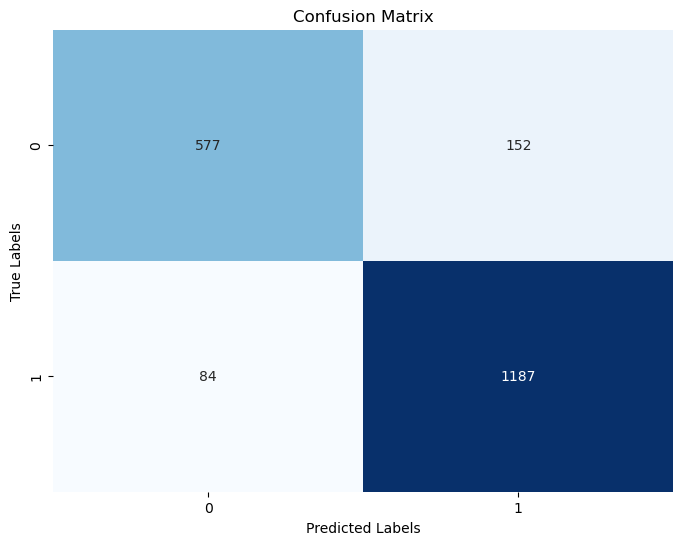

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generate predictions for the test set
y_pred = best_model.predict(X_test_tfidf)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
import joblib
# Save the best model
joblib.dump(best_model, 'best_logistic_model.joblib')
print("Best model saved as 'best_logistic_model.joblib'")

Best model saved as 'best_logistic_model.joblib'
